<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/VNMONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/Money/Train" 
valid_image_files_path = "/content/drive/MyDrive/Money/Validation" 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(150, 150),               
    class_mode='categorical')

Found 888 images belonging to 10 classes.
Found 105 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=20,batch_size=128,verbose=1, validation_data=validation_generator)

Epoch 1/20
28/28 [==============================] - 313s 11s/step - loss: 3.1095 - accuracy: 0.0935 - val_loss: 2.3167 - val_accuracy: 0.0952
Epoch 2/20
28/28 [==============================] - 95s 3s/step - loss: 2.2878 - accuracy: 0.1419 - val_loss: 2.3310 - val_accuracy: 0.0952
Epoch 3/20
28/28 [==============================] - 95s 3s/step - loss: 2.2209 - accuracy: 0.1520 - val_loss: 2.2364 - val_accuracy: 0.1429
Epoch 4/20
28/28 [==============================] - 94s 3s/step - loss: 2.1333 - accuracy: 0.2489 - val_loss: 2.2525 - val_accuracy: 0.1619
Epoch 5/20
28/28 [==============================] - 93s 3s/step - loss: 2.0835 - accuracy: 0.2579 - val_loss: 2.2332 - val_accuracy: 0.1333
Epoch 6/20
28/28 [==============================] - 92s 3s/step - loss: 1.8678 - accuracy: 0.3266 - val_loss: 2.7026 - val_accuracy: 0.1714
Epoch 7/20
28/28 [==============================] - 93s 3s/step - loss: 1.7007 - accuracy: 0.4088 - val_loss: 2.4567 - val_accuracy: 0.1524
Epoch 8/20
28/28 [

<function matplotlib.pyplot.show(*args, **kw)>

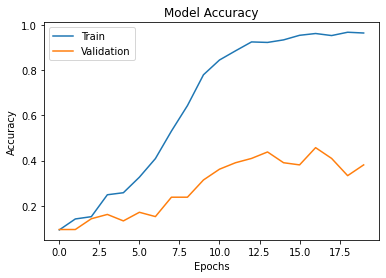

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("VNMoney.h5")

In [ ]:
from tensorflow.keras.models import load_model
model_money=load_model('VNMoney.h5')

1/1 [==============================] - 0s 47ms/step
NAM NGAN DONG


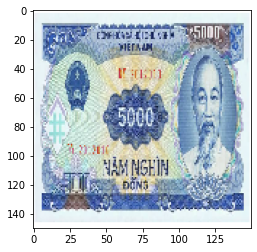

1/1 [==============================] - 0s 49ms/step
MUOI NGAN DONG


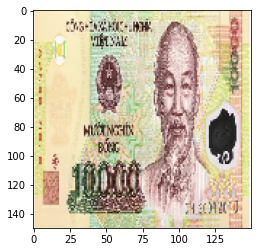

1/1 [==============================] - 0s 46ms/step
NAM TRAM DONG


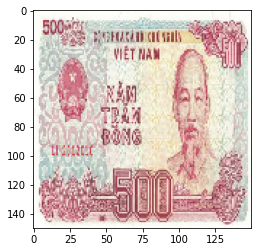

1/1 [==============================] - 0s 43ms/step
HAI MUOI NGAN DONG


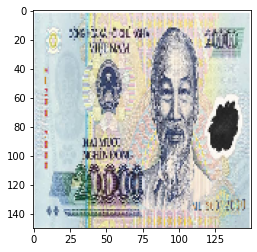

1/1 [==============================] - 0s 42ms/step
NAM NGAN DONG


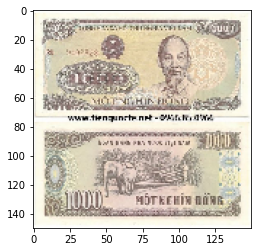

1/1 [==============================] - 0s 89ms/step
NAM MUOI NGAN DONG


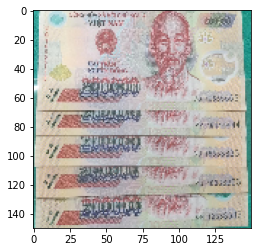

1/1 [==============================] - 0s 50ms/step
MOT TRAM NGAN DONG


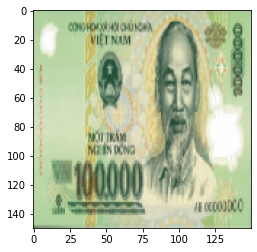

1/1 [==============================] - 0s 42ms/step
HAI NGAN DONG


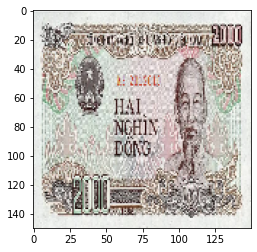

1/1 [==============================] - 0s 43ms/step
NAM MUOI NGAN DONG


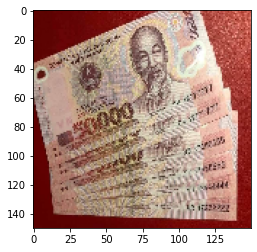

1/1 [==============================] - 0s 45ms/step
HAI MUOI NGAN DONG


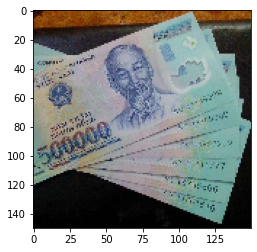

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
test="/content/drive/MyDrive/Test money"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_money.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI MUOI NGAN DONG'
  if round(result[0][5])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][6])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM MUOI NGAN DONG'
  if round(result[0][9])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()

In [ ]:
!jupyter nbconvert --to html "/content/VNMONEY.ipynb"

[NbConvertApp] Converting notebook /content/VNMONEY.ipynb to html
[NbConvertApp] Writing 1779372 bytes to /content/VNMONEY.html
